In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('cleaned_data.csv',sep=',',index_col=0)
data #26 kolumn

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.057513,0.089810,0.527778,0.006364,0.714603,0.183976,1,0.000740,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
99994,0.057078,0.225427,0.347222,0.002045,0.100473,0.931751,2,0.000426,5.0,1.0,...,0,0,0,0,1,0,0,0,0,0
99995,0.057078,0.225427,0.388889,0.002273,0.100473,0.934718,2,0.000426,6.0,1.0,...,0,0,0,0,1,0,0,0,0,0
99996,0.057078,0.225427,0.319444,0.002273,0.100473,0.937685,2,0.000426,5.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
x = data.drop(['Credit_Score'],axis=1)
y = data['Credit_Score']
x.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0


1.Dobór liczby komponentów do PCA z wykorzystaniem wizualizacji skumulowanej wartości wariancji dla różnych wartości komponentów.

array([0.68429748, 0.77263878, 0.79114156, 0.80521212, 0.81889243,
       0.83255535, 0.84615953, 0.859744  , 0.87325357, 0.88667764,
       0.90005256, 0.91341019, 0.92670334, 0.9398893 , 0.95284219,
       0.96570188, 0.9784155 , 0.98740711, 0.99255775, 0.99630176,
       0.99832482, 0.99944499, 0.99997989, 1.        , 1.        ])

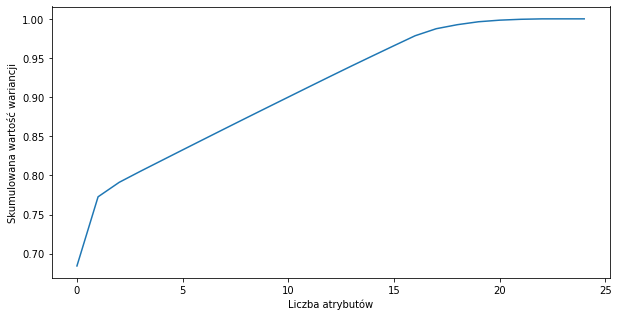

In [4]:
#wizualizacja skumulowanej wartości wariancji w zależności od liczby komponentów
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba atrybutów')
plt.ylabel('Skumulowana wartość wariancji')
plt.gcf().set_size_inches(10,5)

np.cumsum(pca.explained_variance_ratio_) #pierwsze 15 atrybutów wyjaśnia 95% całkowitej wariancji

2.Dobór liczby atrybutów do PCA z wykorzystaniem parametru svd_solver oraz narzuceniem wariancji.
PCA wybiera liczbę atrybutów, tak aby wielkość wariancji do wyjaśnienia była większa niż procent określony przez 'n_components'.

In [5]:
pca = PCA(svd_solver='full',n_components=0.95) 
glowne_skladowe = pca.fit_transform(x)
glowne_df = pd.DataFrame(data=glowne_skladowe)
glowne_df
pca.components_

array([[ 2.00805479e-04,  4.45799674e-02, -9.67359004e-03,
         1.89519590e-04, -1.27842923e-02,  1.30265207e-02,
         2.56407284e-02,  1.86736791e-04,  9.98459802e-01,
         1.57309334e-05,  1.65195275e-04,  1.40424187e-03,
         4.93531244e-05, -5.93947057e-04,  4.17760627e-04,
         4.02349609e-04, -1.13489452e-03, -4.64116215e-04,
         4.10598520e-04, -5.97054820e-04, -7.04447602e-04,
         2.80937815e-04,  8.66540149e-04, -5.78876029e-04,
         7.63592447e-05],
       [-6.31638627e-04, -7.41903709e-02,  1.28066862e-01,
         6.93948551e-04,  1.45018890e-01, -1.76432197e-01,
        -9.61612516e-01,  3.12944155e-05,  3.34101708e-02,
         2.33001540e-05,  1.33909158e-03, -9.40688211e-05,
         1.77564289e-03,  9.11755562e-04,  3.80920215e-03,
        -2.04627507e-03,  1.29463644e-03, -5.01182734e-03,
        -4.98884311e-03,  3.54376591e-04,  2.81048323e-03,
        -3.92373525e-03, -2.97863336e-04, -4.33041749e-04,
         4.50046622e-03],
    

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(glowne_df,y,test_size=0.25,random_state=42)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
51008,-2.270770,0.166749,0.064189,-0.059825,-0.009148,0.015452,-0.057270,-0.045852,-0.216051,-0.282616,-0.529301,-0.657945,-0.195263,-0.117018,-0.146693
56940,2.757464,-0.734270,-0.039750,-0.105240,-0.635746,-0.535714,0.421807,0.034123,0.158658,0.061105,0.036807,-0.000906,-0.025653,-0.042866,-0.091916
11876,1.759457,-0.715752,-0.168728,-0.060957,-0.003362,0.020809,-0.130235,-0.023439,-0.251338,-0.462695,0.743125,-0.091440,-0.195649,-0.110422,-0.139389
44822,-0.260020,0.115622,0.373749,0.954934,0.008808,-0.019039,0.054389,0.004529,0.047733,0.025239,0.017079,0.000413,-0.018488,-0.024591,-0.042348
61765,1.787460,-0.767306,0.059502,-0.075344,-0.004340,0.021773,-0.100379,-0.034601,-0.244858,-0.463615,0.746630,-0.096143,-0.230393,-0.118701,-0.116419


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report

clf_lg = LogisticRegression(random_state = 10).fit(x_train,y_train) #uczenie modelu
y_pred = clf_lg.predict(x_test) # predykcja zbioru testowego

#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test, y_pred))
#średnia ważona f1-score dla wszystkich klas
print("Miara F1: ",f1_score(y_test, y_pred,average='weighted'))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test, y_pred,average=None))

Miara dokładności:  0.5648339060710195
Miara F1:  0.5241230525039839
Miara F1 dla poszczególnych klas:  [0.44507108 0.67078008 0.19252487]


Wartość miary F1 różni się od miary dokładności, ze względu na niezrównoważone liczebności poszczególnych klas, ponieważ miara dokładności nie bierze pod uwagę niezbilansowania klas. W tym przypadku miara F1-Score jest bardziej wiarygodna.

Najdokładniej została sklasyfikowana klasa 2 a najmniej klasa 3.

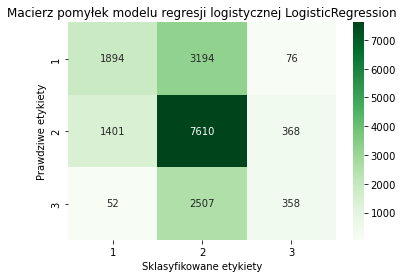

In [8]:
plt.figure()
matrix = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety') 
ax.set_title(f'Macierz pomyłek modelu regresji logistycznej {type(clf_lg).__name__}'); 
ax.xaxis.set_ticklabels(clf_lg.classes_); ax.yaxis.set_ticklabels(clf_lg.classes_);

Model najczęściej mylił klasę "1" z klasą "2" oraz klasę "3" z klasą "2". 

Dokładność(Accuracy) = (1894 + 7610 + 358) / wszystko = 0.56

Czułość(Recall) - Czułość jest to stosunek liczby dobrze sklasyfikowanych danych do liczby wszystkich danych z danej klasy.

    Klasa 1: 1894/1894 +3194 +76  = 1894/5164 = 0.37

    Klasa 2: 7610/(1401+7610+368) = 0.81

    Klasa 3: 358/(52+2507+358) = 0.12 
    
    
Precyzja(Precision) - Precyzja jest to stosunek liczby poprawnie sklasyfikowanych danych do wszystkich danych sklasyfikowanych jako dana klasa.

    Klasa 1: 1894/(1894+1401+52) = 0.56

    Klasa 2: 7610/(3194+7610+2507) = 0.57

    Klasa 3: 358/(358+368+76) = 0.44



In [9]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.566     0.367     0.445      5164
           2      0.572     0.811     0.671      9379
           3      0.446     0.123     0.193      2917

    accuracy                          0.565     17460
   macro avg      0.528     0.434     0.436     17460
weighted avg      0.549     0.565     0.524     17460

